In [2]:
import os
import glob
import pandas as pd
import numpy as np
import pandas as pd
import pycytominer
import pycytominer.operations

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

os.chdir('./output/clustermaps')

In [3]:
# read input from level 8
path = './'
extension = '.parquet'
os.chdir(path)
batch = glob.glob('../level7_modz_consensus_df_perwell{}'.format(extension))

batch

['../level7_modz_consensus_df_perwell.parquet']

In [51]:
# read data
df = pd.read_parquet(batch[0])
print(len(df))

#------------- plates ----------------#
selected_plates = ["P103573","P103587","P103588"]
df = df[~df['Metadata_plate_map_name'].isin(selected_plates)]

# ----------- compounds ---------------#
selected_compounds = ["DMSO", "uninfected","DD4386006","DI1202001","DO8167002","[fenb]","[etop]","[stau]"]
df = df[df['Metadata_cmpdName'].isin(selected_compounds)]

#------------- doses ----------------#
#selected_doses = [0.3,10.0]
#df = df[df['Metadata_cmpdConc'].isin(selected_doses)]

# remove AB features !!!
df = df.filter(regex='^(?!.*ER)') #remove AB features


7967


In [52]:
df["Metadata_cmpdAndDose"] = df["Metadata_cmpdName"] + "_" + df["Metadata_cmpdConc"].astype(str)

# ClusterMap

In [53]:
df = df.drop(columns=["Metadata_Well","Metadata_cmpdConc", "Metadata_cmpdName","Metadata_plate_map_name"])  
df = df.groupby(["Metadata_cmpdAndDose"]).mean()
df = df.reset_index()
df

,Metadata_cmpdAndDose,Nuclei_AreaShape_Eccentricity,Nuclei_AreaShape_Extent,Nuclei_AreaShape_MajorAxisLength,Nuclei_AreaShape_MaxFeretDiameter,Nuclei_AreaShape_MinFeretDiameter,Nuclei_AreaShape_Orientation,Nuclei_AreaShape_Perimeter,Nuclei_AreaShape_Zernike_0_0,Nuclei_AreaShape_Zernike_1_1,...,Cells_RadialDistribution_ZernikePhase_RNA_8_0,Cells_RadialDistribution_ZernikePhase_RNA_8_2,Cells_RadialDistribution_ZernikePhase_RNA_8_4,Cells_RadialDistribution_ZernikePhase_RNA_8_6,Cells_RadialDistribution_ZernikePhase_RNA_8_8,Cells_RadialDistribution_ZernikePhase_RNA_9_1,Cells_RadialDistribution_ZernikePhase_RNA_9_3,Cells_RadialDistribution_ZernikePhase_RNA_9_5,Cells_RadialDistribution_ZernikePhase_RNA_9_7,Cells_RadialDistribution_ZernikePhase_RNA_9_9
0,DD4386006_0.008333,0.218526,0.533179,1.126180,1.170003,0.923284,0.239744,1.147810,0.024886,-1.091198,...,0.540302,-0.246562,0.432801,-0.040368,0.388434,0.081749,0.253552,0.070030,0.219405,0.194215
1,DD4386006_0.033333,-0.887928,1.082960,1.941119,2.001822,2.590164,0.115860,2.345394,1.201123,-1.225067,...,1.026269,0.101081,-0.319302,0.050259,-0.024647,0.166257,0.064778,-0.273426,-0.210869,0.221878
2,DD4386006_0.1,-1.835463,2.077749,1.368515,1.424078,2.725698,-0.482269,1.988418,2.244557,-1.525560,...,1.205567,0.228756,-0.177917,0.335514,0.300049,0.085563,0.066873,0.211656,-0.259500,0.205044
3,DD4386006_0.3,-1.318831,1.404637,1.552131,1.608331,2.672601,-0.049990,2.166185,1.722776,-0.914311,...,0.349720,0.021516,-0.016023,-0.000605,0.043799,0.027702,-0.007599,-0.041022,-0.015566,-0.037316
4,DD4386006_0.833333,-1.233922,1.346731,1.947460,2.006568,3.124087,-0.072342,2.646309,1.655269,-0.398635,...,0.138196,-0.301279,0.432190,0.013843,0.356511,-0.362921,0.045063,-0.292895,-0.369889,-0.506240
5,DD4386006_10.0,-0.477794,0.635638,4.119454,4.283245,4.332133,0.056645,4.814423,0.576698,-0.932810,...,1.405757,0.064198,0.068389,0.005497,-0.011049,0.031683,-0.115781,-0.035637,-0.040892,0.022049
6,DD4386006_3.333333,-0.825024,1.035584,3.265151,3.366113,3.908219,-0.023532,3.950020,1.152542,-0.896989,...,0.800068,0.039428,0.000415,0.012676,-0.030685,-0.046978,0.154008,-0.017505,-0.064187,0.089506
7,DD4386006_30.0,-0.286657,0.145275,4.051178,4.250607,3.963544,-0.055218,4.676512,0.052620,-0.705985,...,1.966791,0.069047,0.003078,0.111387,0.026571,-0.031152,0.010234,0.025162,-0.074073,0.073046
8,DI1202001_0.008333,-0.117351,-0.068128,-0.270754,-0.192164,0.147095,-0.377114,-0.180840,0.018891,0.391304,...,1.008769,0.012649,0.368713,0.016408,-0.062337,-0.271377,-0.134050,-0.658107,0.070192,0.155321
9,DI1202001_0.033333,0.078782,0.135586,0.545450,0.530463,0.462909,-0.133854,0.523455,0.000900,-0.427000,...,0.152097,0.300300,0.586127,-0.176736,0.000742,0.473307,-0.309911,-0.055729,0.171246,-0.216409


In [54]:
df_all         = df.copy()
print(df_all.shape)
df_data        = df.loc[:, ~df.columns.str.contains('Meta')].values
df_meta        = df.loc[:, df.columns.str.contains('Meta')]

scaled_data    = StandardScaler().fit_transform(df_data)
scaled_data_df = pd.DataFrame(scaled_data)
print(scaled_data_df.shape)

scaled_data_df = pd.concat([df_meta, scaled_data_df], axis=1)

scaled_data_df.columns = df_all.columns
print(scaled_data_df.shape)

scaled_data_df.head(5)

(29, 971)
(29, 970)
(29, 971)


,Metadata_cmpdAndDose,Nuclei_AreaShape_Eccentricity,Nuclei_AreaShape_Extent,Nuclei_AreaShape_MajorAxisLength,Nuclei_AreaShape_MaxFeretDiameter,Nuclei_AreaShape_MinFeretDiameter,Nuclei_AreaShape_Orientation,Nuclei_AreaShape_Perimeter,Nuclei_AreaShape_Zernike_0_0,Nuclei_AreaShape_Zernike_1_1,...,Cells_RadialDistribution_ZernikePhase_RNA_8_0,Cells_RadialDistribution_ZernikePhase_RNA_8_2,Cells_RadialDistribution_ZernikePhase_RNA_8_4,Cells_RadialDistribution_ZernikePhase_RNA_8_6,Cells_RadialDistribution_ZernikePhase_RNA_8_8,Cells_RadialDistribution_ZernikePhase_RNA_9_1,Cells_RadialDistribution_ZernikePhase_RNA_9_3,Cells_RadialDistribution_ZernikePhase_RNA_9_5,Cells_RadialDistribution_ZernikePhase_RNA_9_7,Cells_RadialDistribution_ZernikePhase_RNA_9_9
0,DD4386006_0.008333,0.085320,0.171276,0.181129,0.185370,0.053825,0.450606,0.138264,0.077604,-0.031160,...,0.107743,-1.489203,1.538914,-0.470609,0.914069,0.429978,1.038368,0.449976,1.216165,1.043537
1,DD4386006_0.033333,-0.205246,0.210700,0.468071,0.408719,0.314881,0.324780,0.303528,0.215306,-0.091127,...,0.972205,0.380663,-1.679917,-0.205048,-0.300523,0.877262,0.239401,-1.161299,-0.833498,1.163250
2,DD4386006_0.1,-0.454077,0.282034,0.266456,0.253591,0.336108,-0.282722,0.254266,0.337460,-0.225731,...,1.291150,1.067389,-1.074821,0.630823,0.654186,0.450162,0.248266,1.114398,-1.065156,1.090398
3,DD4386006_0.3,-0.318405,0.233766,0.331108,0.303064,0.327792,0.156331,0.278798,0.276376,0.048076,...,-0.231274,-0.047291,-0.381949,-0.354095,-0.099268,0.143912,-0.066926,-0.071009,0.096851,0.041568
4,DD4386006_0.833333,-0.296107,0.229614,0.470304,0.409994,0.398501,0.133630,0.345054,0.268473,0.279071,...,-0.607543,-1.783506,1.536299,-0.311758,0.820203,-1.923599,0.155961,-1.252635,-1.591007,-1.987731


In [55]:
# group by cmp and conc

scaled_data_df2 = scaled_data_df.set_index("Metadata_cmpdAndDose")
index_name      = scaled_data_df2.rename_axis('Metadata_cmpdAndDose')

scaled_data_df2 = scaled_data_df2.drop(columns=[col for col in scaled_data_df2.columns if 'plate' in col])

# clustermap but with labels

In [56]:
unique_compounds = df['Metadata_cmpdAndDose'].unique()
palette = {}

for i, compound in enumerate(unique_compounds):
    base_color = sns.color_palette("husl", len(unique_compounds))[i]
    unique_doses = sorted(df[df['Metadata_cmpdAndDose'] == compound]['Metadata_cmpdAndDose'].unique())
    color_shades = sns.light_palette(base_color, len(unique_doses) + 1)[1:]  # +1 and [1:] to skip the lightest shade
    for dose, color in zip(unique_doses, color_shades):
        palette[f"{compound}_{dose}"] = color

In [57]:
# Assign colors based on your 'Metadata_cmpdName' and 'Metadata_cmpdConc'
colour_meta = 'Metadata_cmpdAndDose'

df_label = df.copy()
df_label = df_label.reset_index()

df_label['colour_meta_cat'] = pd.Categorical(df_label[colour_meta])
df_label['Metadata_cat'] = df_label.colour_meta_cat.cat.codes
df_label['code'] = df_label['Metadata_cat'].astype('category')
y = df_label['code'].to_numpy()

labels = y
row_colors = [palette[f"{df_label.at[idx, colour_meta]}_{df_label.at[idx, 'Metadata_cmpdAndDose']}"] for idx in df_label.index]

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


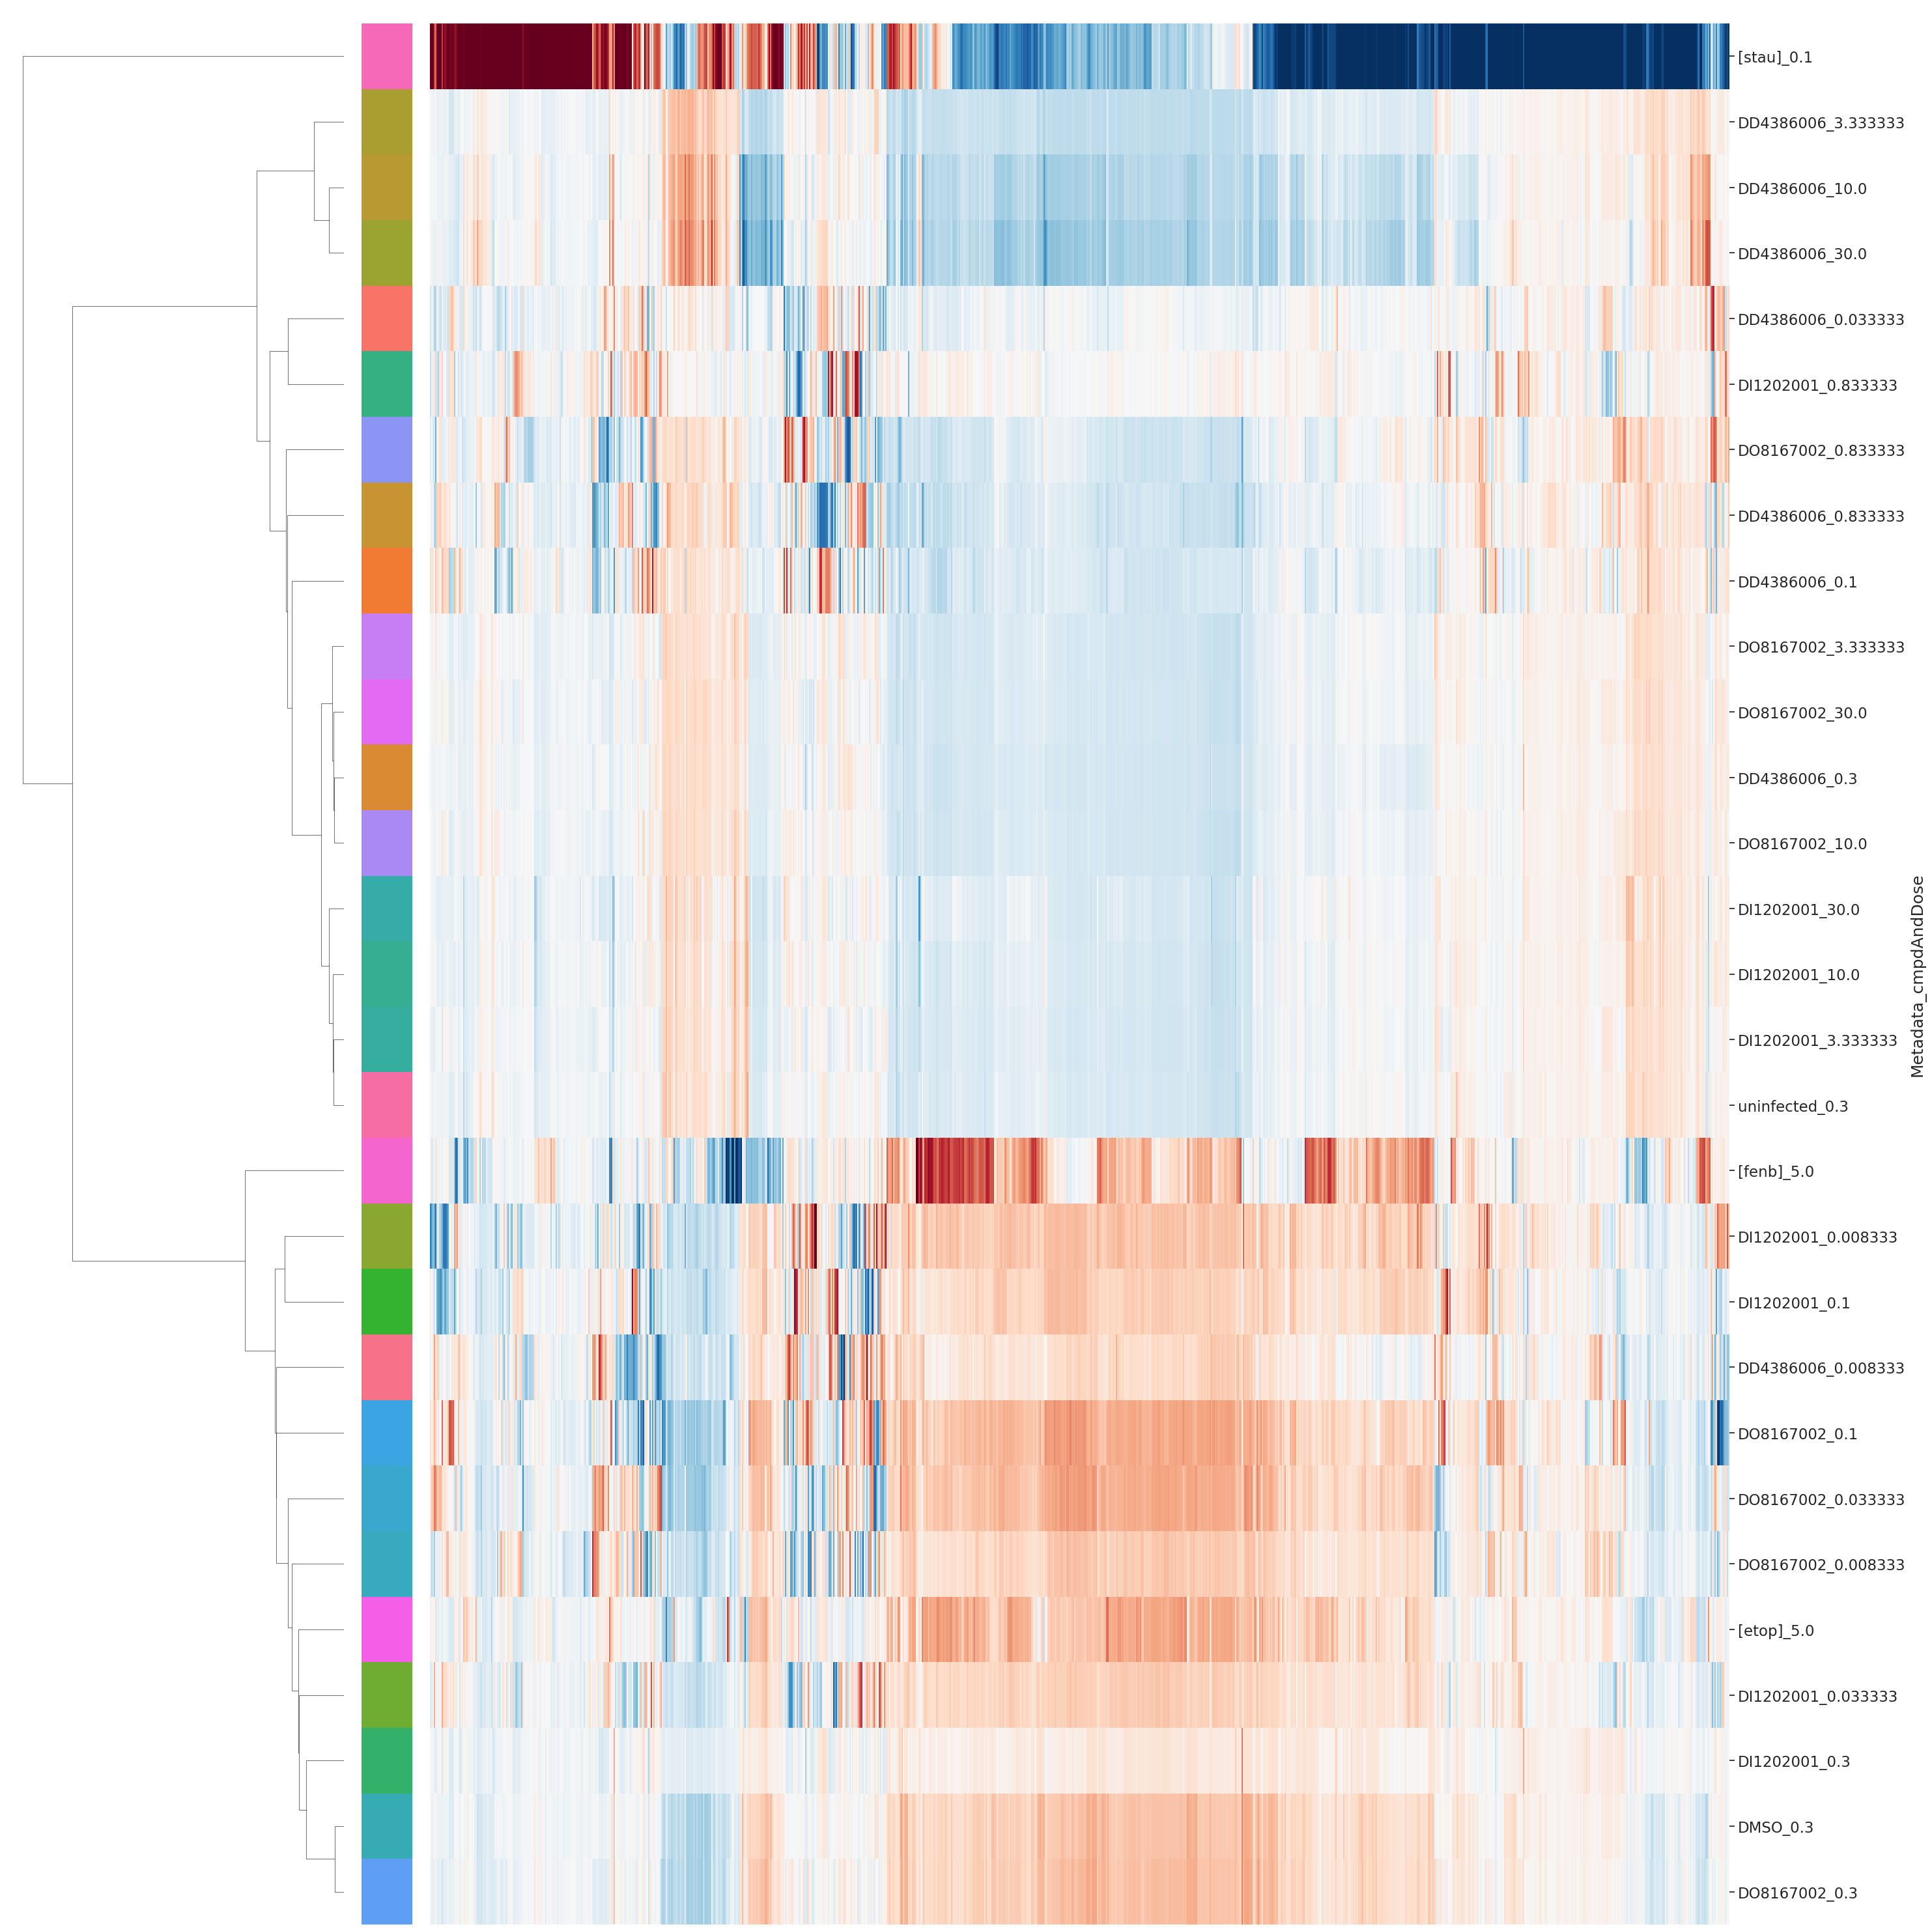

In [59]:
sns.set(font_scale=1.5)

sns_cluster = sns.clustermap(scaled_data_df2, method='ward', metric='euclidean', z_score=None,
                   standard_scale=None,  cbar_kws=None, figsize=(30, 30), 
                   row_cluster=True, col_cluster=True,
                   cbar_pos=None,
                   dendrogram_ratio=(.2, 0),
                   vmin=-4, vmax=4,
                   row_linkage=None, col_linkage=None, 
                   row_colors=row_colors,  
                   col_colors=None,
                   cmap="RdBu_r",
                   xticklabels=False,
                   yticklabels=True)  

plt.tight_layout()
sns_cluster.savefig('Clustermap_Batch.pdf', dpi=150, bbox_inches='tight')


# pearsson correlation between compounds

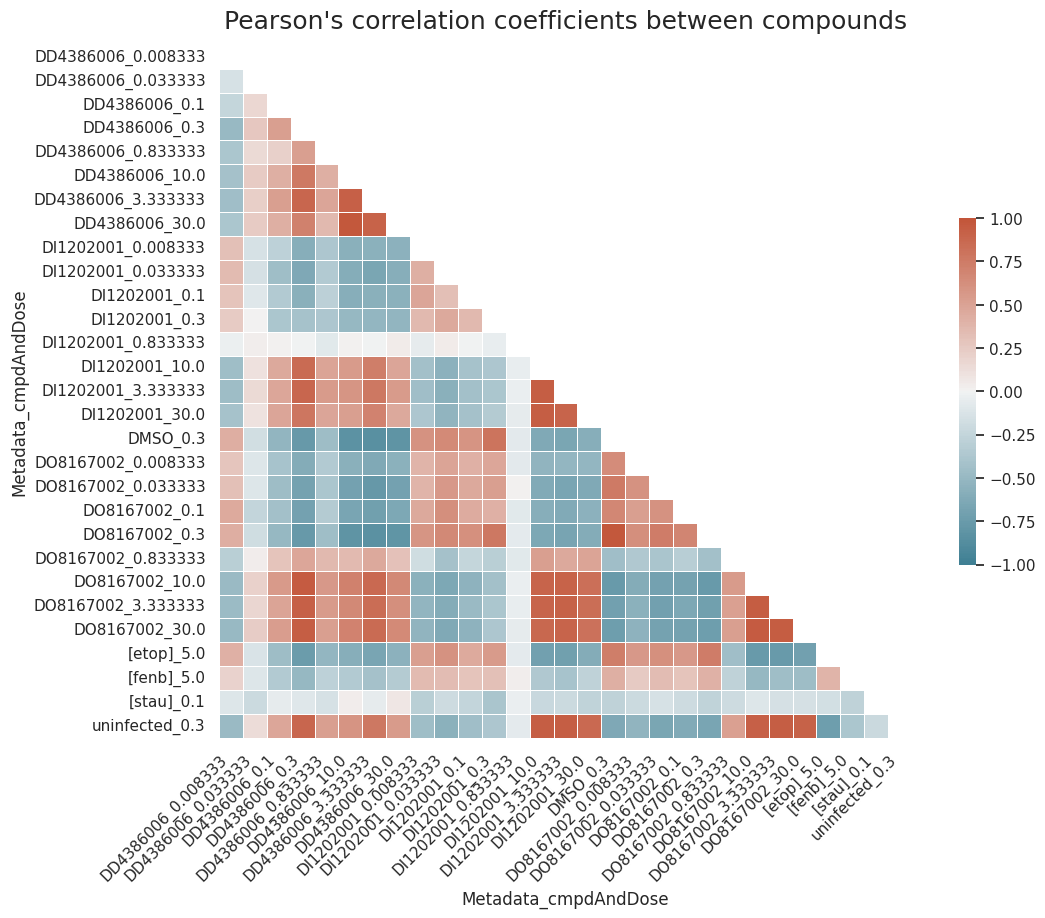

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

compound_correlation_matrix = scaled_data_df2.T.corr(method='pearson')

sns.set(font_scale=1)
sns.set_style("white")
mask = np.triu(np.ones_like(compound_correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 9)) 

sns.heatmap(compound_correlation_matrix, vmin=-1, vmax=1, mask=mask, linewidths=.5, ax=ax, fmt='.2f',
            annot=False, cmap=sns.diverging_palette(220, 20, n=200), cbar_kws={"shrink": 0.5}, square=True)

ax.set_title('Pearson\'s correlation coefficients between compounds', fontdict={'fontsize':18}, pad=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

fig.savefig('CorrelationMatrix_Compounds.pdf', dpi=300, bbox_inches='tight')

plt.show()

# Biosimilarity score

In [68]:
from scipy.spatial import distance

# Similarities of phenotypic fingerprints (BioSim) were calculated from the correlation distances (CD) between two fingerprints:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html
# where x is the mean of the elements of x, is the dot product of x and y, and is the Euclidean norm of x:
# The BioSim is then defined as: BioSim = 1−CD
# https://www.sciencedirect.com/science/article/pii/S2451945621005237

In [113]:
# read data
df = pd.read_parquet(batch[0])
print(len(df))

#------------- plates ----------------#
selected_plates = ["P103573","P103587","P103588"]
df = df[~df['Metadata_plate_map_name'].isin(selected_plates)]

# ----------- compounds ---------------#
selected_compounds = ["DMSO", "uninfected","DD4386006","DI1202001","DO8167002","[fenb]","[etop]","[stau]"]
df = df[df['Metadata_cmpdName'].isin(selected_compounds)]

#------------- doses ----------------#
#selected_doses = [0.3,10.0]
#df = df[df['Metadata_cmpdConc'].isin(selected_doses)]

# remove AB features !!!
df = df.filter(regex='^(?!.*ER)') #remove AB features

7967


In [114]:
df['condition']= df.apply(lambda x:'%s_%s' % (x['Metadata_cmpdName'],x['Metadata_cmpdConc']),axis=1)
df = df.sort_values(by=['Metadata_cmpdName','Metadata_cmpdConc'])
df = df.iloc[: , 5:]
df = df.groupby(by=["condition"], dropna=False).mean() 
df = df.reset_index()
conditions = df["condition"].to_list()

In [115]:
BioSimdict = {}  

for i in conditions:  
    
    #--------- reference -----------#
    ref = df.loc[df['condition'] == "uninfected_0.3"]
    ref = ref.iloc[: , 1:]
    ref = ref.values.flatten()

     #---------- test compound -------#

    test = df.loc[df['condition'] == i]
    test = test.iloc[: , 1:]
    test = test.values.flatten()

    # ---------- distance ------------#
    CD = distance.correlation(ref, test, centered=True)
    BioSim = 1 - CD
    BioSim_perc = (BioSim * 100).round(0)

    # --------- add to dictionary ----#

    BioSimdict[i] = BioSim_perc

In [116]:
df["BioSim_scipy"]  = df["condition"].map(BioSimdict)
result = df[["condition","BioSim_scipy"]].sort_values(by="BioSim_scipy", ascending=False)


In [117]:
result

,condition,BioSim_scipy
28,uninfected_0.3,100.0
14,DI1202001_3.333333,99.0
22,DO8167002_10.0,99.0
13,DI1202001_10.0,99.0
3,DD4386006_0.3,99.0
24,DO8167002_30.0,99.0
23,DO8167002_3.333333,99.0
15,DI1202001_30.0,98.0
21,DO8167002_0.833333,97.0
4,DD4386006_0.833333,97.0
